# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [69]:
import numpy as np

from components.system import System
from components.connection import ConnectionFactory, Connection
from components.model import Model
from components.connection_functions import DrivenCascadeFunction, EnergyExchangeFunction

### Setting up the system

In [70]:
reservoir_nodes=2
system_nodes=1

In [71]:
"""
Defining System setup
"""

system_state = np.array([[1, 0], [0, 0]])
system_node_list = [0]

if len(system_node_list) != system_nodes:
    raise Exception

system_connections = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, connections=system_connections
)

### Setting up the interface

In [72]:

"""
Defining Interface setup
"""

interfaceFactory = ConnectionFactory(DrivenCascadeFunction, gamma_1=[0.5, 1.5], gamma_2=[0.5,1.5])

### Setting up the reservoir

In [73]:
"""
Defining Reservoir setup
"""

reservoirFactory = ConnectionFactory(EnergyExchangeFunction, is_hamiltonian=True, J=10)

### Setting up the model

In [74]:
model = Model()
model.setSystem(system)
model.setReservoirConnectionFac(reservoirFactory)
model.setInterfaceConectionFac(interfaceFactory)
model.generateReservoir(reservoir_nodes, init_quantum_state=0)
model.generateInterface(connection_rate=1)
model.setRunDuration(2.5)
model.setRunResolution(0.001)


### Running the model

In [75]:
model.run()

In [76]:
log = model.modelLog
log.traceSystem(system_nodes, basis=[np.array([[1],[0]]), np.array([[0], [1]])])

### Plotting results

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


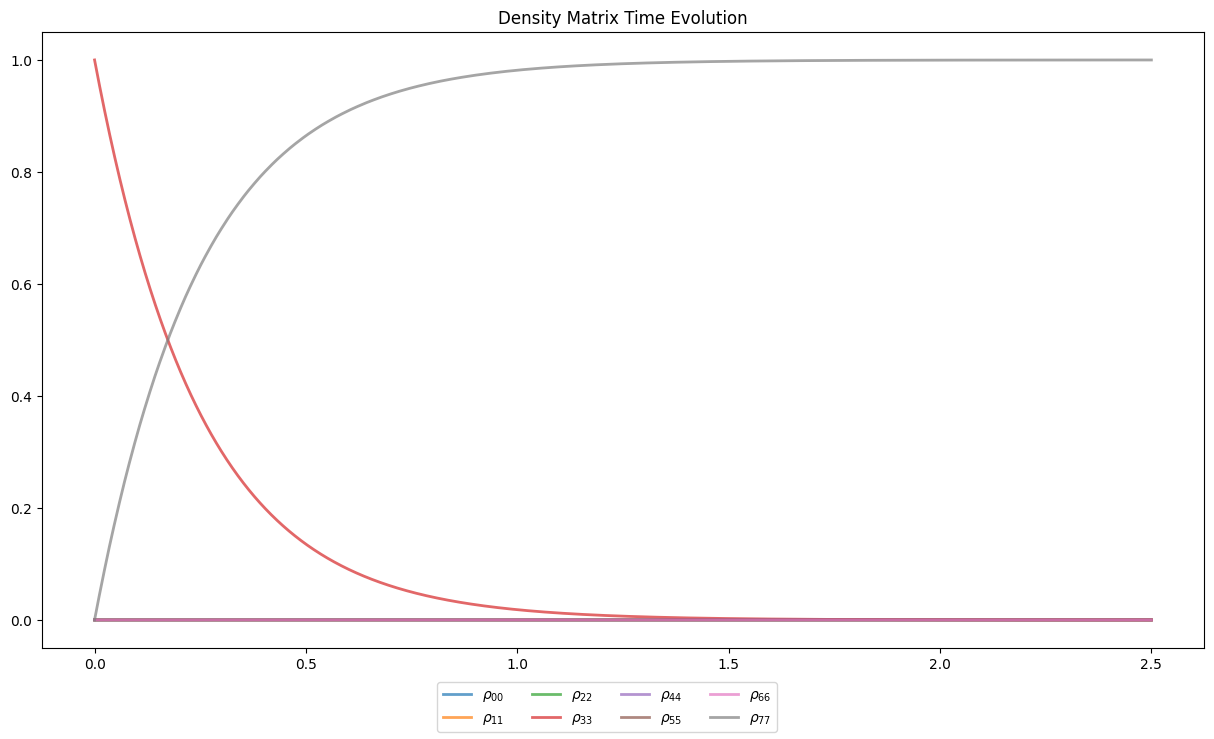

In [77]:
log.plot(plot_trace=False)

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


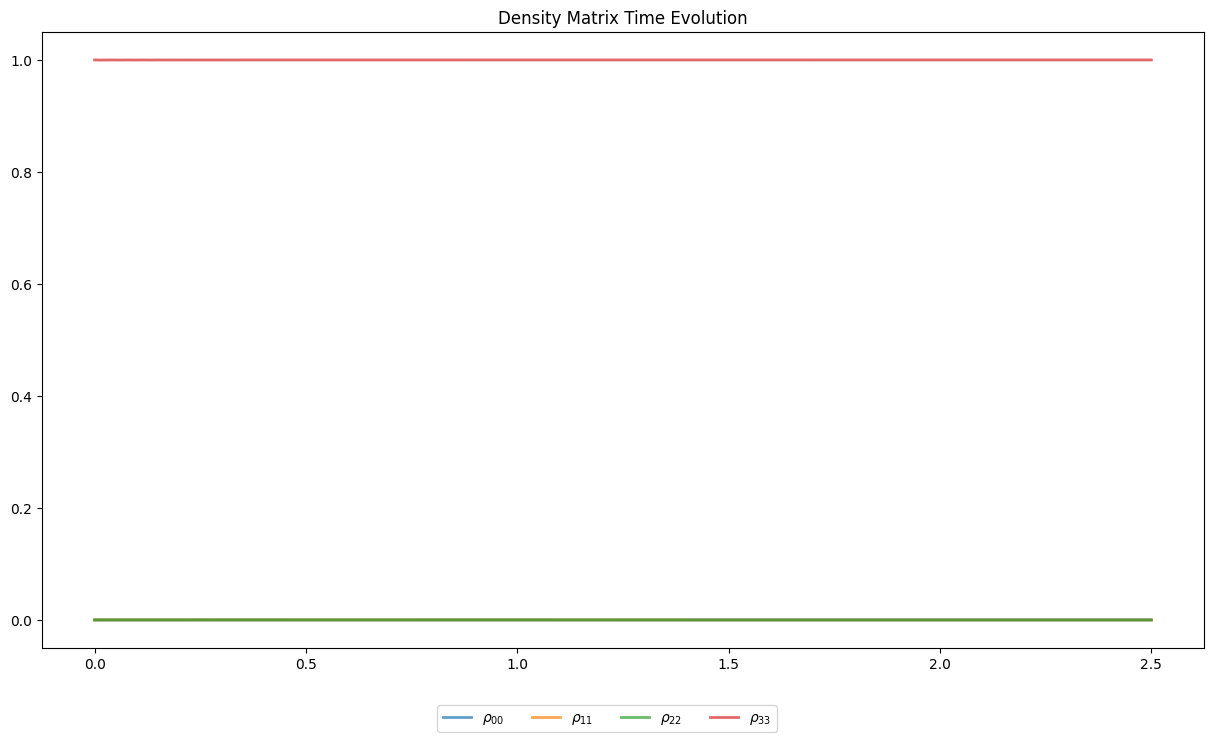

In [78]:
log.plot(plot_trace=True)

In [79]:
model.interface.connections

{'interface_connection_02': <components.connection.Connection at 0x1aad2d30370>,
 'interface_connection_01': <components.connection.Connection at 0x1aad2d476a0>}